In [12]:
import torch 
import numpy as np 
import matplotlib.pyplot as plt
from torch import nn

In [13]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [14]:
weights = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).to(device=device)
y = bias + weights * X

len(X), len(y)

(50, 50)

In [15]:
X = X.unsqueeze(dim=-1)

In [16]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [17]:
def plot_predictions(train_data=X_train, train_lables=y_train, test_data=X_test, test_lables=y_test, predictions=None):
    plt.scatter(train_data.cpu().numpy(), train_lables.cpu().numpy(), c='b', s=4, label='Train data')
    plt.scatter(test_data.cpu().numpy(), test_lables.cpu().numpy(), c='g', s=4, label='Test data')

    if predictions != None:
        plt.scatter(test_data.cpu().numpy(), predictions.cpu().numpy(), c='r', s=4, label='Predictions')
    
    plt.legend()
    

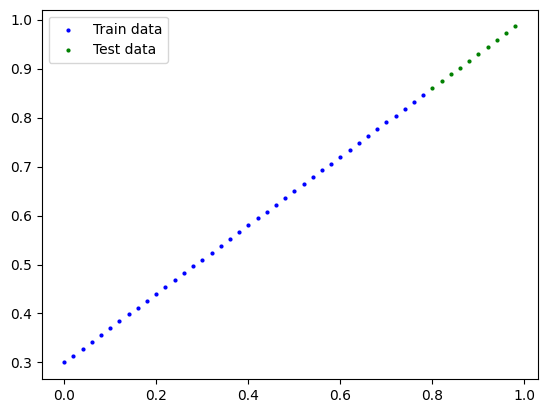

In [18]:
plot_predictions()

In [19]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x:torch.Tensor)->torch.Tensor:
        return self.linear_layer(x)

In [20]:
model = nn.Sequential(
    nn.Linear(in_features=1, out_features=1)
)

model.state_dict()

OrderedDict([('0.weight', tensor([[-0.6091]])), ('0.bias', tensor([0.6142]))])

In [21]:
torch.manual_seed(42)

model = LogisticRegression()
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [22]:
next(model.parameters()).device

device(type='cpu')

In [23]:
model.to(device)
next(model.parameters()).device

device(type='cuda', index=0)

In [24]:
epochs = 10000

for epoch in range(1,epochs+1):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Eval loop
    model.eval()

    with torch.inference_mode():    
        test_pred = model(X_test)

        test_loss = loss_fn(test_pred, y_test)

    # print
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

d:\environments\mltorch\lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([40])) that is different to the input size (torch.Size([40, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
d:\environments\mltorch\lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch: 1 | Loss: 0.5552012920379639 | Test loss: 0.574013888835907
Epoch: 2 | Loss: 0.5437553524971008 | Test loss: 0.5605806112289429
Epoch: 3 | Loss: 0.5323348045349121 | Test loss: 0.547185480594635
Epoch: 4 | Loss: 0.5209753513336182 | Test loss: 0.5338417887687683
Epoch: 5 | Loss: 0.5097047090530396 | Test loss: 0.5204979777336121
Epoch: 6 | Loss: 0.4984827935695648 | Test loss: 0.5072189569473267
Epoch: 7 | Loss: 0.4873623251914978 | Test loss: 0.4940182864665985
Epoch: 8 | Loss: 0.47636815905570984 | Test loss: 0.48084279894828796
Epoch: 9 | Loss: 0.4654720723628998 | Test loss: 0.46773427724838257
Epoch: 10 | Loss: 0.45469412207603455 | Test loss: 0.4547320008277893
Epoch: 11 | Loss: 0.44407570362091064 | Test loss: 0.44179439544677734
Epoch: 12 | Loss: 0.4336152672767639 | Test loss: 0.42891258001327515
Epoch: 13 | Loss: 0.4232781231403351 | Test loss: 0.4161657691001892
Epoch: 14 | Loss: 0.4131300151348114 | Test loss: 0.4035395681858063
Epoch: 15 | Loss: 0.403207927942276 | 

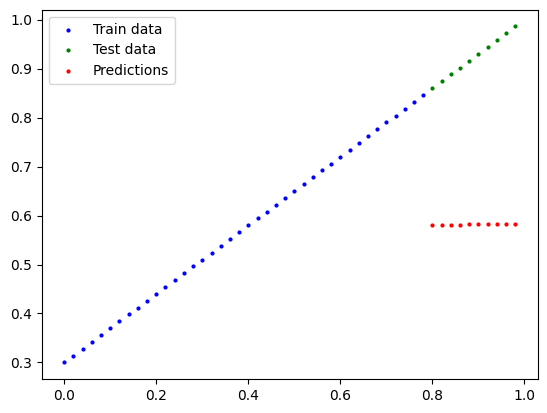

In [25]:
with torch.inference_mode():    
    test_pred = model(X_test)
plot_predictions(predictions=test_pred)